In [1]:
# Importing all the necessary basic libraries.,
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data

In [2]:
oo = pd.read_csv('C:/Users/HARIKRISHNAN M/Downloads/titanic_dataset_1.csv')
oo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [3]:
oo.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### There are missing values in Age and Cabin column

In [4]:
oo.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### The target column which is Survived is imbalanced

In [5]:
oo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
oo.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.00,0,1,248727,33.0000,NaN,S
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.00,0,0,230434,13.0000,NaN,S
681,682,1,1,"Hassab, Mr. Hammad",male,27.00,0,0,PC 17572,76.7292,D49,C
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.00,0,0,PC 17590,50.4958,A24,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


# Missing Value

#### Dataset have missing values in Age, Cabin and Embarked columns

#### Lets start with Age column.

<AxesSubplot:>

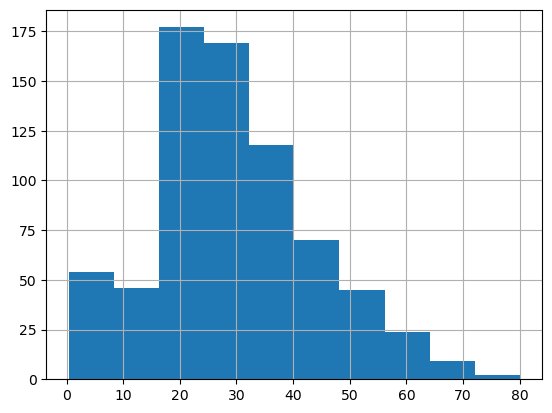

In [7]:
oo.Age.hist()

#### Not a Normal distribution for sure. So, we can choose median. But, using median age of the whole dataset is not a good choice. Let us see to which coloumn, age has high coorelation with.

In [8]:
oo.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### It is clear that Age has high correlation with Pclass (-0.36) and Pclass infact has high correlation with target column (0.33).

In [9]:
oo_corr = oo.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
oo_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
oo_corr[oo_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
5,Age,Age,1.000000
12,Age,Pclass,0.369226
16,Age,SibSp,0.308247
21,Age,Parch,0.189119
26,Age,Fare,0.096067
32,Age,Survived,0.077221
36,Age,PassengerId,0.036847


In [10]:
oo_corr = oo.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
oo_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
oo_corr[oo_corr['Feature 1'] == 'Pclass']

,Feature 1,Feature 2,Correlation Coefficient
4,Pclass,Pclass,1.000000
8,Pclass,Fare,0.549500
11,Pclass,Age,0.369226
14,Pclass,Survived,0.338481
28,Pclass,SibSp,0.083081
39,Pclass,PassengerId,0.035144
41,Pclass,Parch,0.018443


#### Now, in Pclass, we have 3 unique values or 3 classes 1, 2 and 3. so, lets see how is the median of ages in these classes

In [11]:
age_by_pclass = oo.groupby(['Pclass']).median()['Age']

for pclass in range(1, 4):
    print('Median age of Pclass {} : {}'.format(pclass, age_by_pclass[pclass]))
print('Median age of all passengers: {}'.format(oo['Age'].median()))

Median age of Pclass 1 : 37.0
Median age of Pclass 2 : 29.0
Median age of Pclass 3 : 24.0
Median age of all passengers: 28.0


#### So, median of age is different in all the Pclass. now, let us check whether it is different in each Pclass based on gender

In [12]:
age_by_pclass_sex = oo.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(oo['Age'].median()))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


#### Filling the missing values in Age with the medians of Sex and Pclass groups

In [13]:
oo['Age'] = oo.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
oo.Age.isna().sum()

0

#### Lets see Embarked column. Only 2 values are missing so lets check them

In [14]:
oo[oo.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### Both of those passengers are female, upper class and they have the same ticket number. This means that they know each other and embarked from the same port together. On googling, it was found that Stone, Mrs. George Nelson (Martha Evelyn) embarked from Southampton, S. Hence, filling with the same.

In [15]:
oo.Embarked = oo.Embarked.fillna('S')
oo.Embarked.isna().sum()

0

#### Let us see Cabin.

In [16]:
oo.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

#### the first letter of cabin is the deck where these cabins are located. The postioning of these cabins would have affected the survival rate and let us check it. Lets take M for missing Cabin

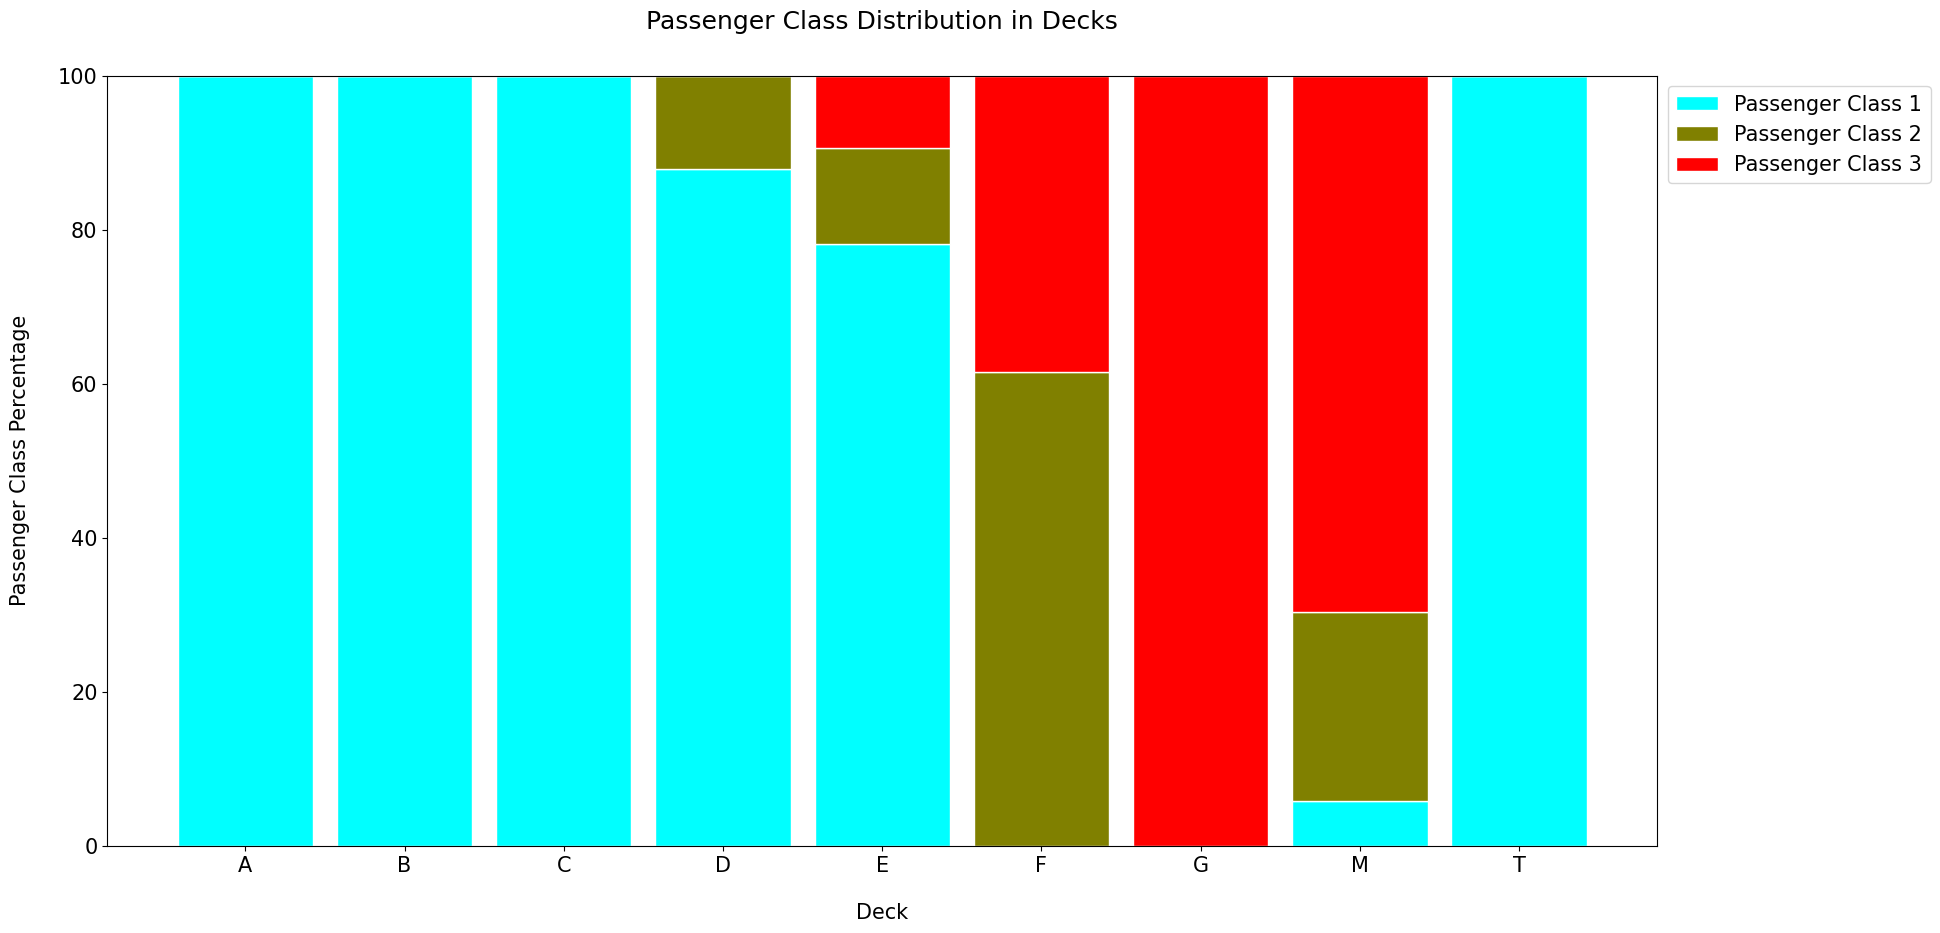

In [17]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
oo['Deck'] = oo['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

oo_all_decks = oo.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='cyan', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='olive', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='red', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(oo_all_decks)
display_pclass_dist(all_deck_per)

#### See the histogram, the decks A, B, T and C are fully occupied by 1st class passengers, whereas G has only 3rd class passengers. It is not possible to find M so let us keep it like that. Also, we cannot omit the column because it may have an effect on survvival chance in the ship. So, lets see the passanger count in each deck.

In [18]:
oo.Deck.value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64

#### Note there is only one person in T deck, lets see the details

In [19]:
oo[oo.Deck =='T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,T


#### 1st class passenger who is male 

In [20]:
age_by_deck_sex = oo.groupby(['Sex', 'Deck']).median()['Age']
age_by_deck_sex

Sex     Deck
female  A       48.0
        B       30.0
        C       35.0
        D       41.5
        E       33.0
        F       24.0
        G       14.0
        M       22.0
male    A       40.0
        B       36.0
        C       40.0
        D       37.0
        E       46.0
        F       22.0
        M       25.0
        T       45.0
Name: Age, dtype: float64

In [21]:
count_by_deck_sex = oo.groupby(['Sex', 'Deck']).size()
count_by_deck_sex

Sex     Deck
female  A         1
        B        27
        C        27
        D        18
        E        15
        F         5
        G         4
        M       217
male    A        14
        B        20
        C        32
        D        15
        E        17
        F         8
        M       470
        T         1
dtype: int64

#### The C deck has more males and the median age is 40 so we can merge T deck with C as the passanger in T is 45 yrs old male.

In [22]:
Tindex = oo[oo['Deck'] == 'T'].index
oo.loc[Tindex, 'Deck'] = 'C'

#### Lets see the survived percentage in each deck

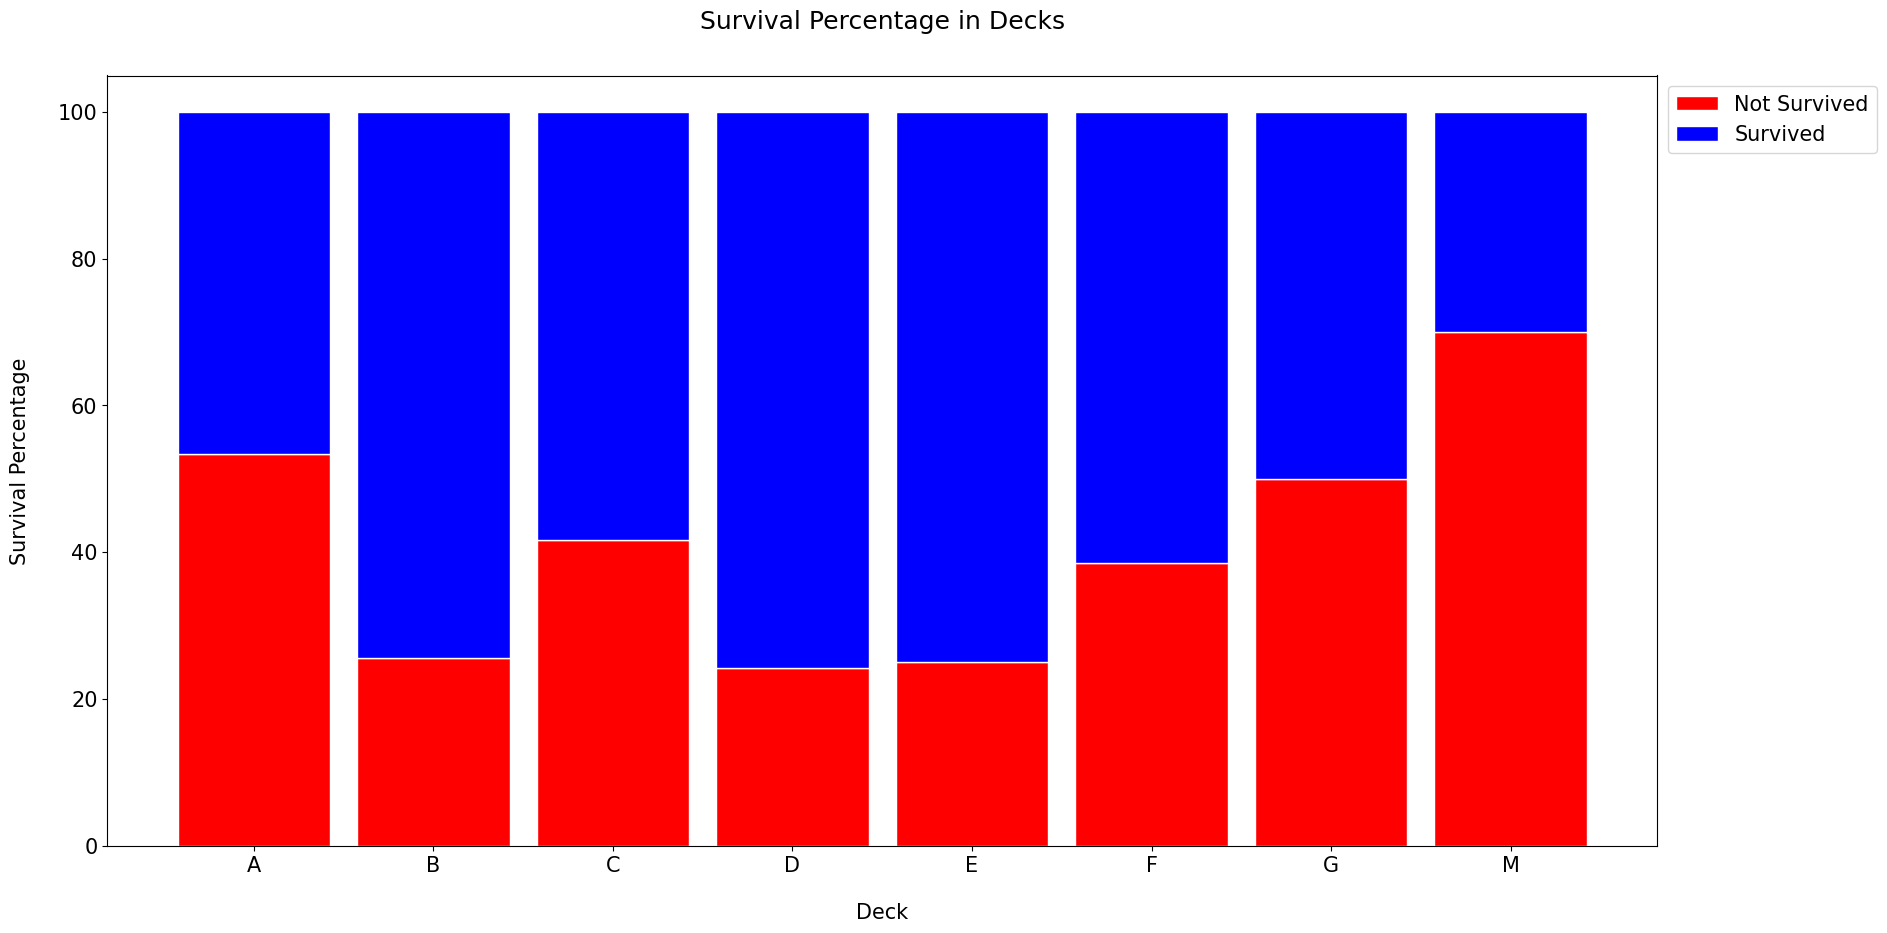

In [23]:
oo_all_decks_survived = oo.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    
    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='red', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='blue', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(oo_all_decks_survived)
display_surv_dist(all_surv_per)

#### Deck B,D and E has high survival rate and mostly occupied by first class passengers. Deck has high cardinality so lets merge some decks

In [24]:
oo['Deck'] = oo['Deck'].replace(['A', 'B', 'C'], 'ABC')
oo['Deck'] = oo['Deck'].replace(['D', 'E'], 'DE')
oo['Deck'] = oo['Deck'].replace(['F', 'G'], 'FG')

oo['Deck'].value_counts()

M      687
ABC    122
DE      65
FG      17
Name: Deck, dtype: int64

#### Let us see the correlation between features

In [25]:
df_train_corr = oo.drop(['PassengerId'], axis=1).corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)
# Training set high correlations
corr = df_train_corr_nd['Correlation Coefficient'] > 0.1
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Fare,Pclass,0.549500
8,Parch,SibSp,0.414838
10,Age,Pclass,0.413583
12,Survived,Pclass,0.338481
14,Fare,Survived,0.257307
16,SibSp,Age,0.249854
18,Fare,Parch,0.216225
20,Age,Parch,0.175526
22,SibSp,Fare,0.159651
24,Age,Fare,0.122692


Text(0.5, 1.0, 'Training Set Correlations')

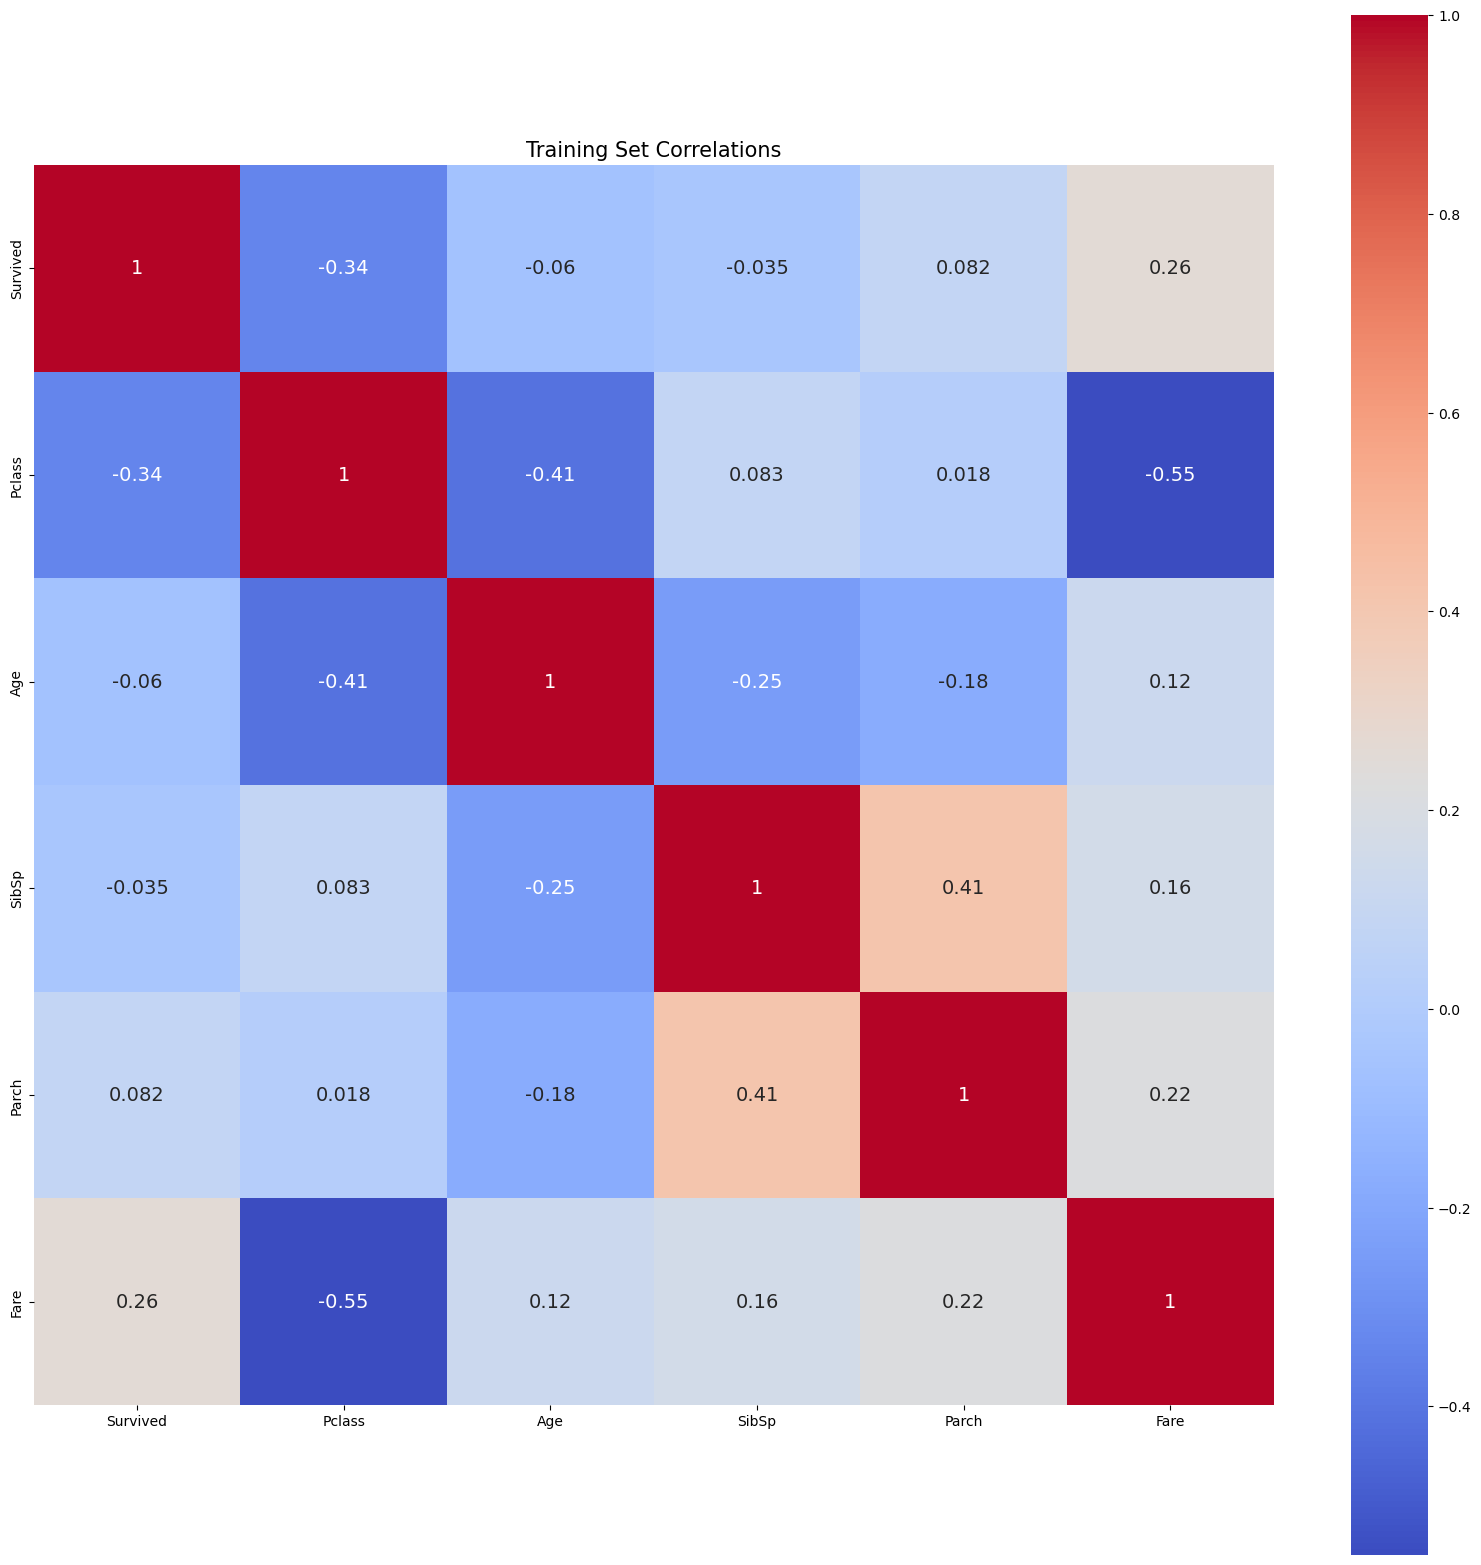

In [26]:
fig, axs = plt.subplots(nrows=1, figsize=(20, 20))

sns.heatmap(oo.drop(['PassengerId'], axis=1).corr(), annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
axs.set_title('Training Set Correlations', size=15)

#### Let us see the distribution

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

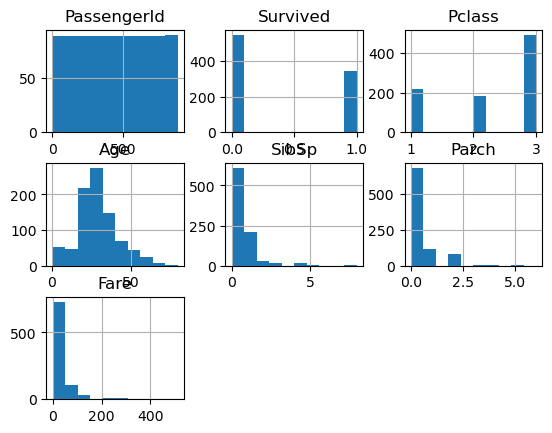

In [27]:
oo.hist()

#### Let us see the distribution of continous features: Age and Fare

C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

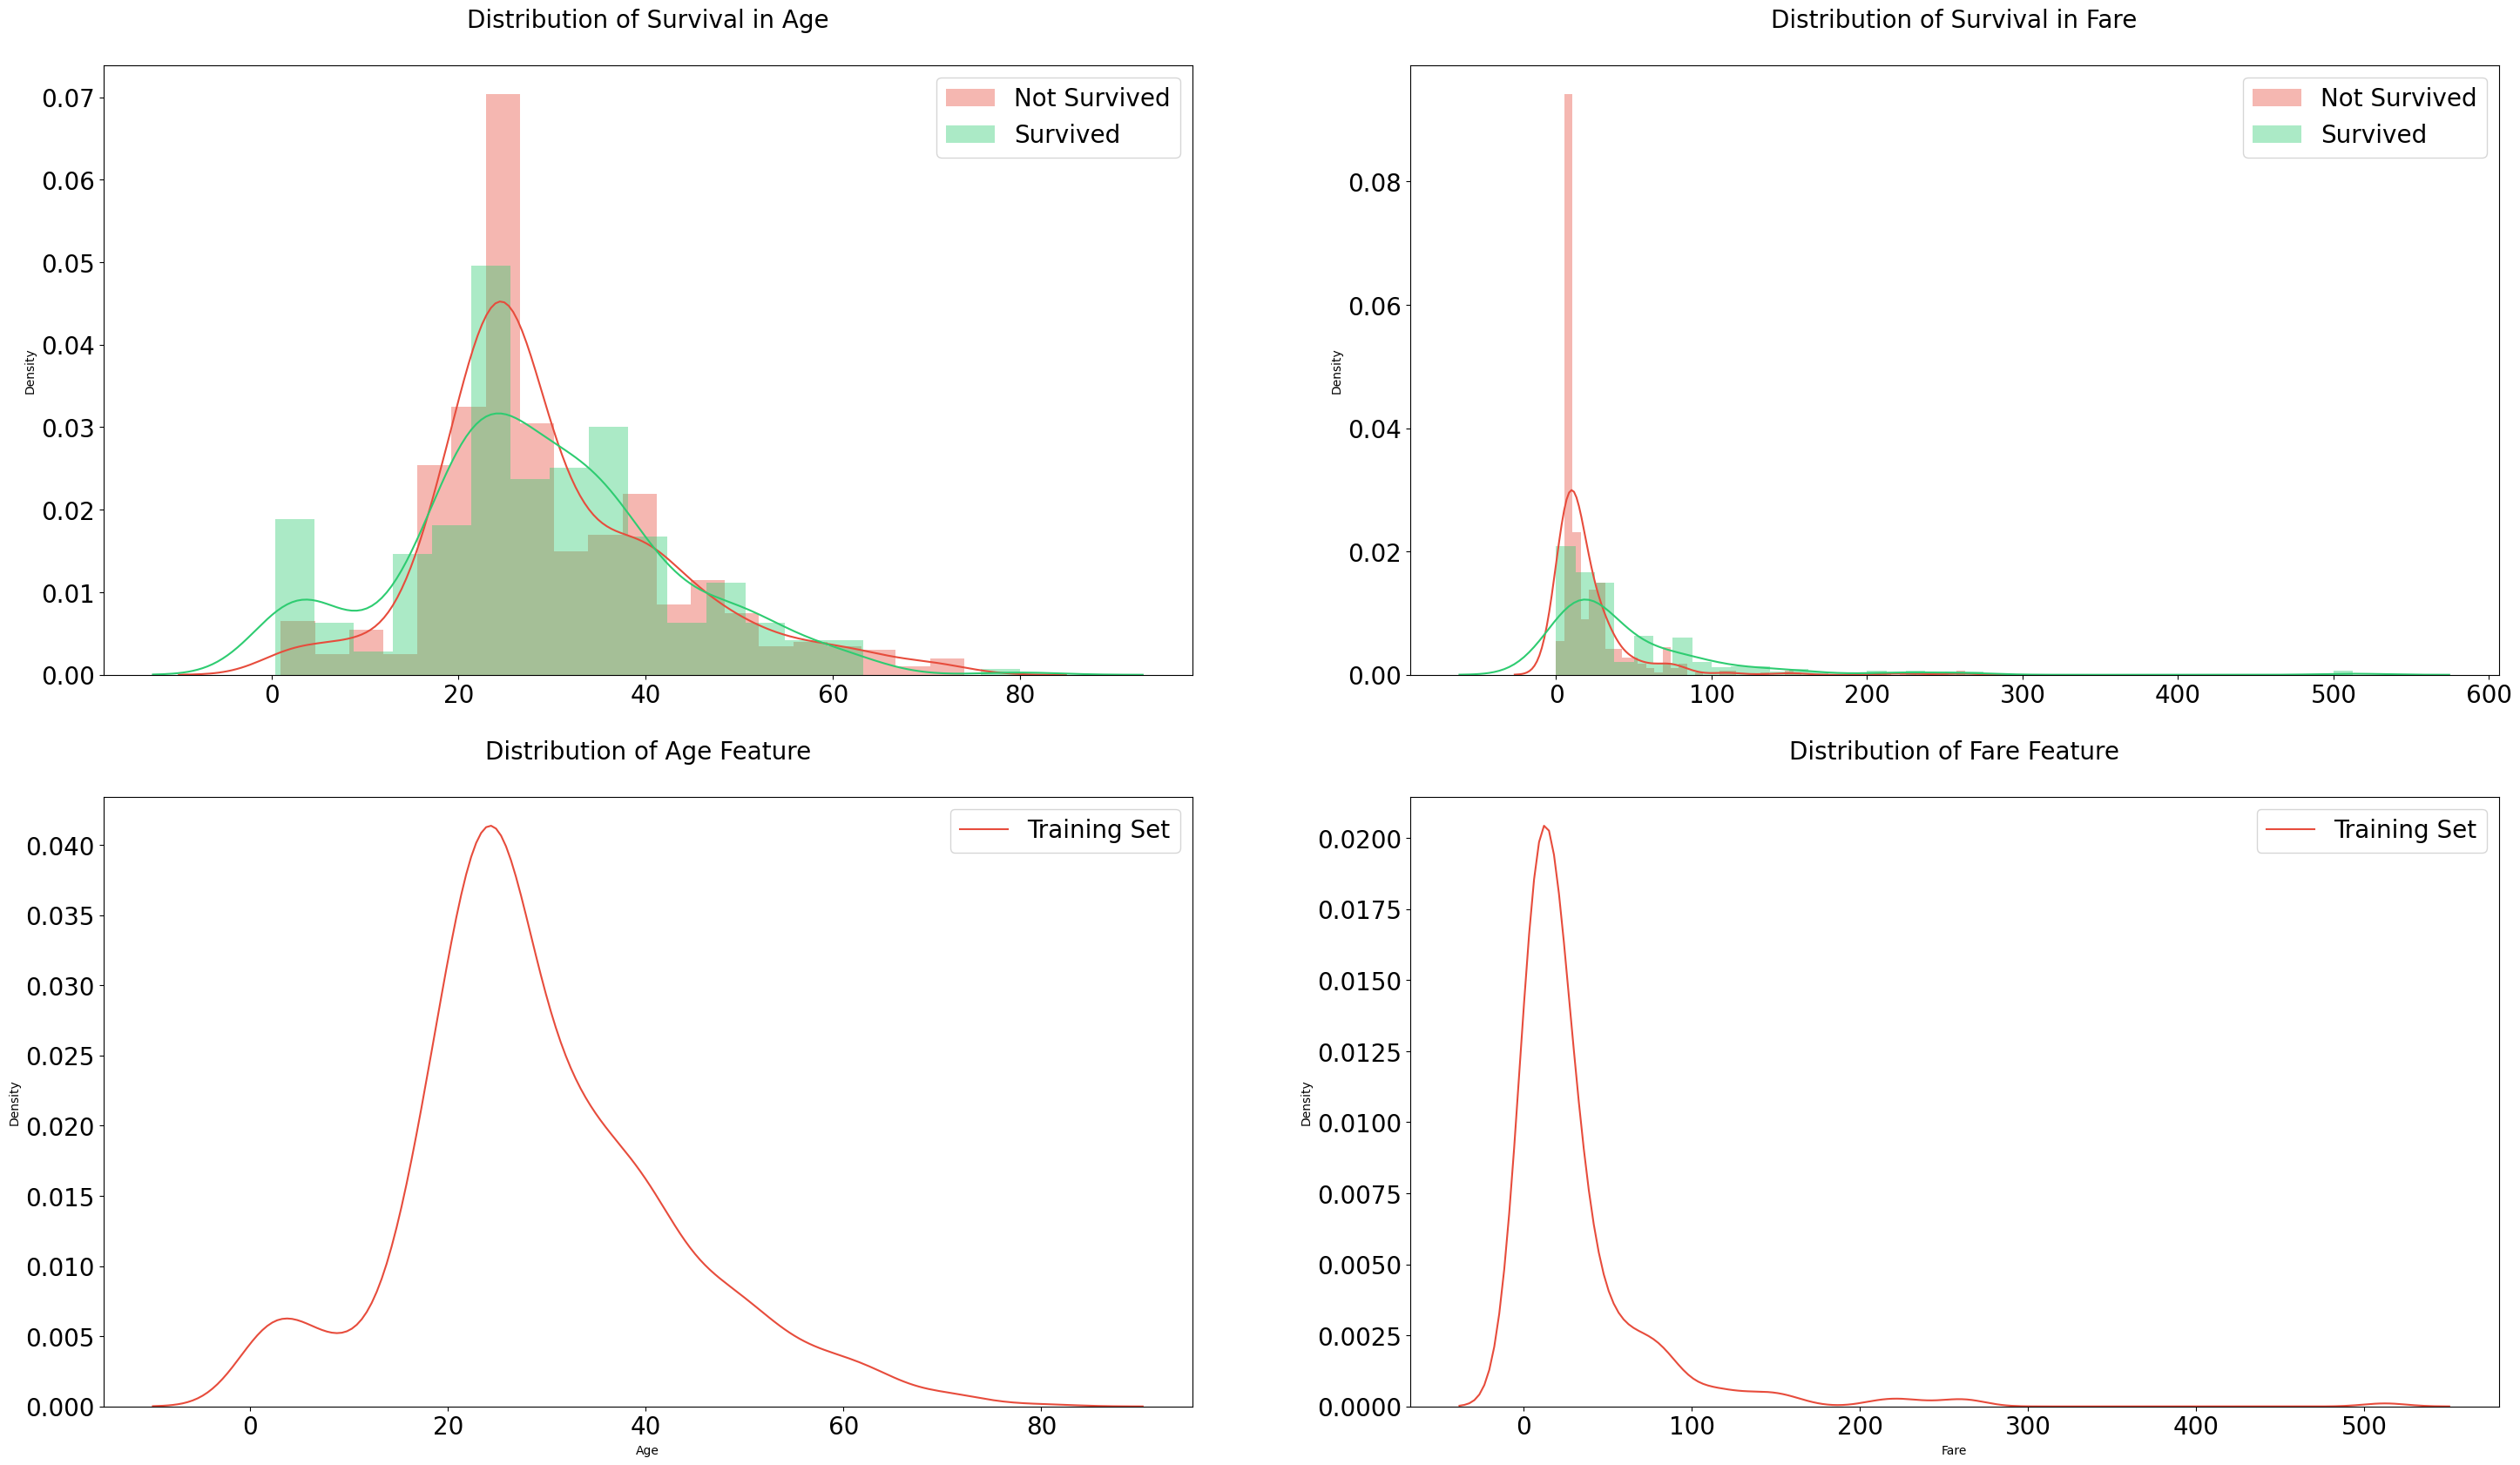

In [28]:
cont_features = ['Age', 'Fare']
surv = oo['Survived'] == 1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):    
    # Distribution of survival in feature
    sns.distplot(oo[~surv][feature], label='Not Survived', hist=True, color='#e74c3c', ax=axs[0][i])
    sns.distplot(oo[surv][feature], label='Survived', hist=True, color='#2ecc71', ax=axs[0][i])
    
    # Distribution of feature in dataset
    sns.distplot(oo[feature], label='Training Set', hist=False, color='#e74c3c', ax=axs[1][i])
    
    axs[0][i].set_xlabel('')
    
    for j in range(2):        
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
    
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1.05)
        
plt.show()

#### Let us see the categorical feature distribution

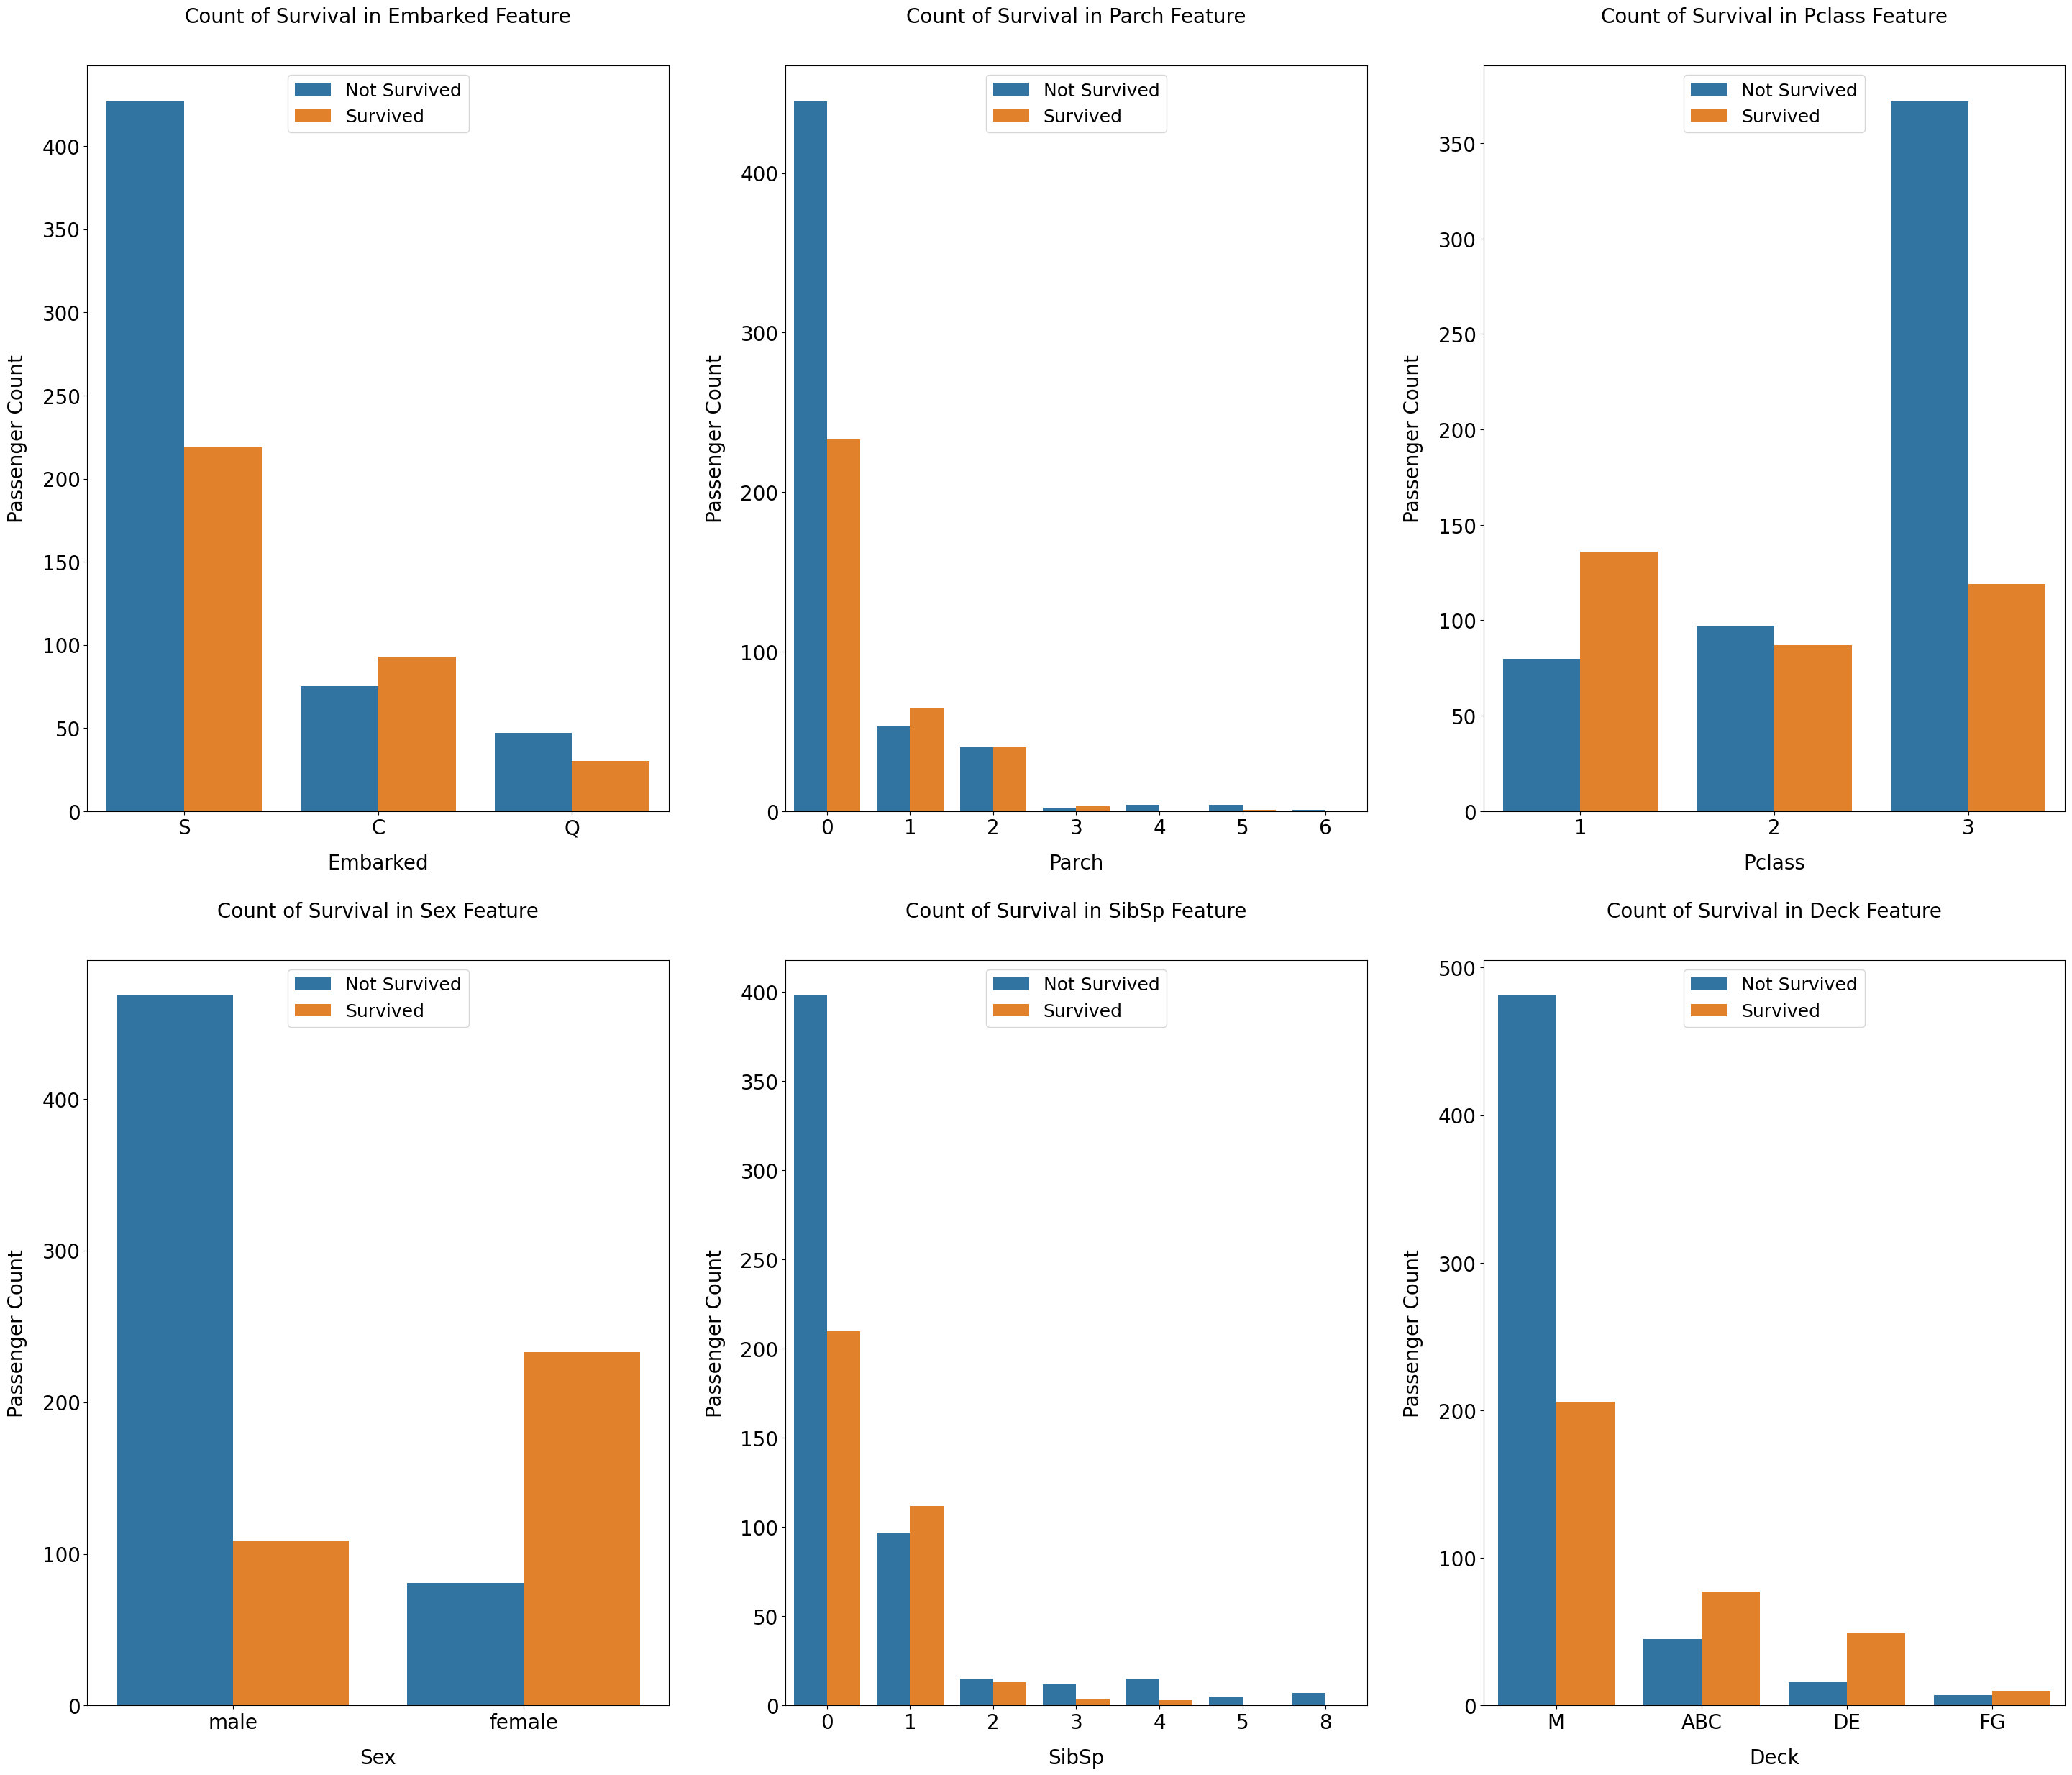

In [29]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Deck']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=oo)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

# Feature Engg

## BInning continous features

In [30]:
o1 = oo

#### let us see the continous features : Age and Fare in bins

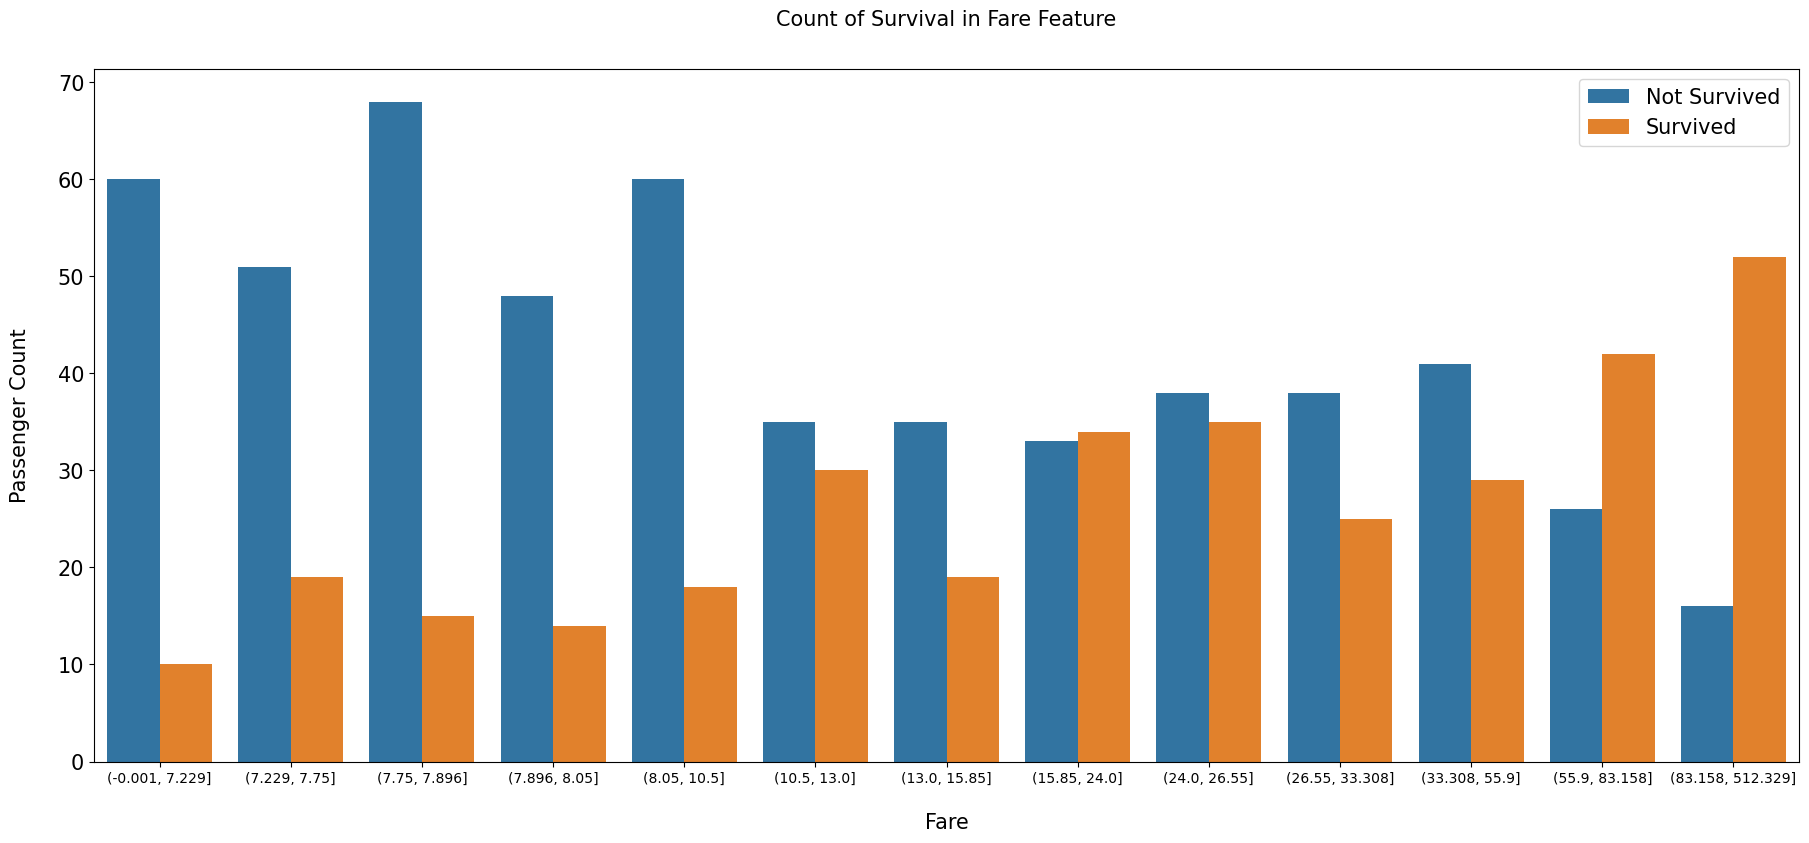

In [31]:
o1['Fare'] = pd.qcut(o1['Fare'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=o1)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

#### Fare is positively skewed and the survival rate is high on the right end which can be seen in the above plot also

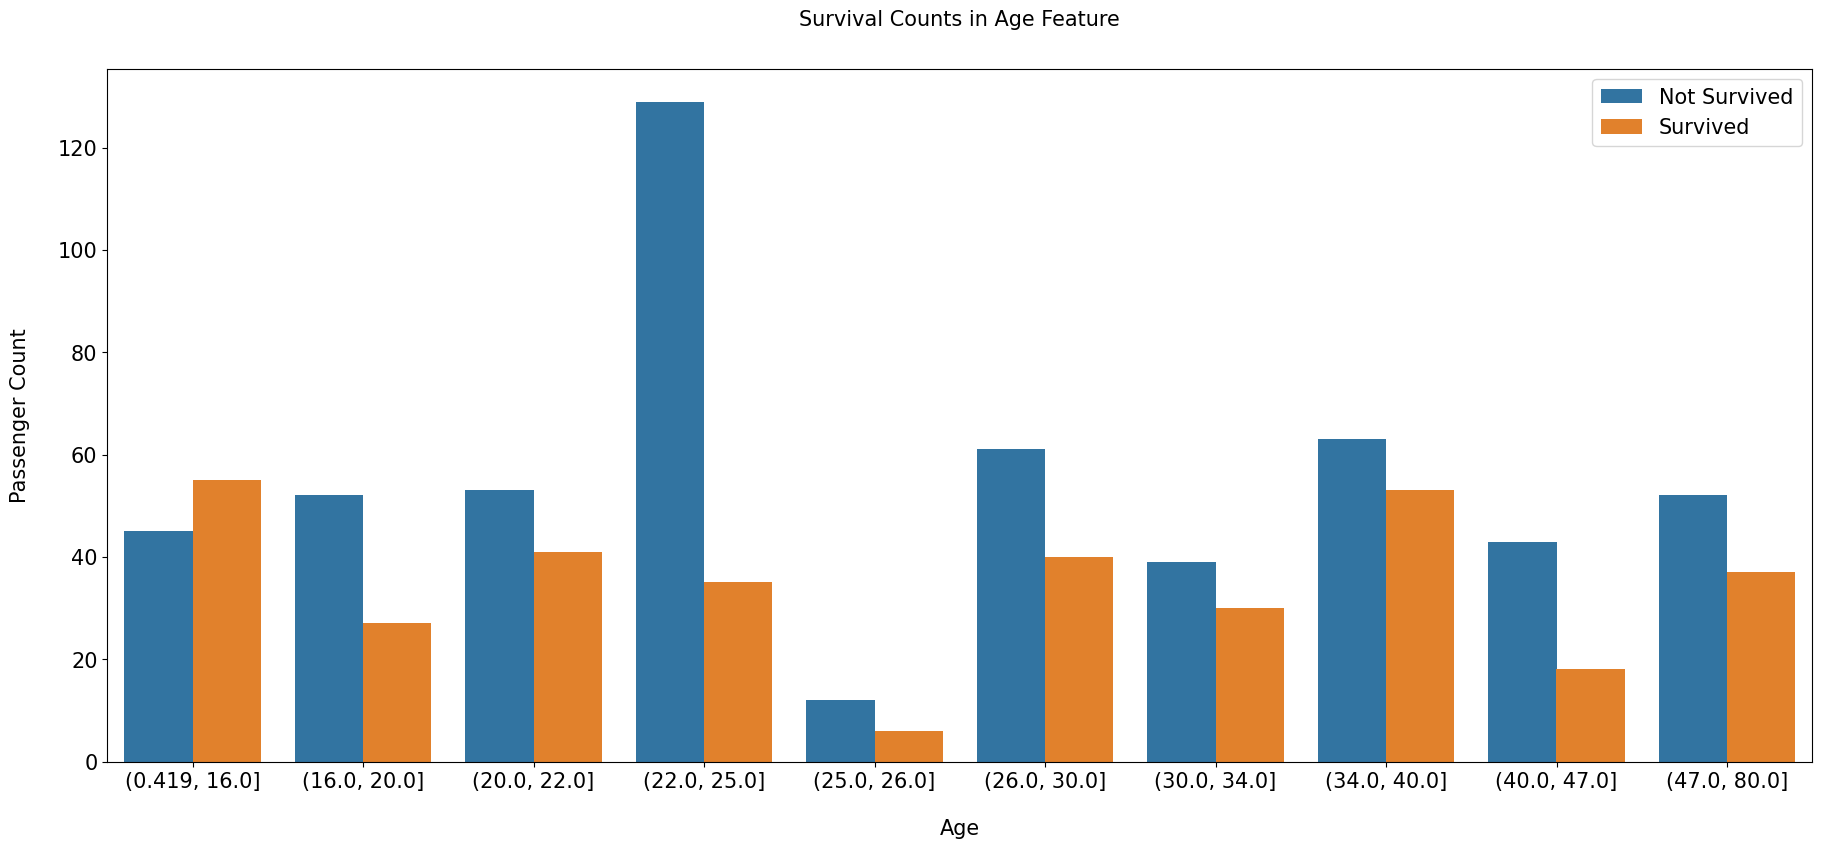

In [32]:
o1['Age'] = pd.qcut(o1['Age'], 10)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=o1)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

## Frequency Encoding

#### SibSp is the count of siblings and spouse, and Parch is the count of parents and children. Lets make a new column called Family size and let us see its impact on survival rate. Family of 1 is alone; 2,3 and 4 is small; 5 and 6 is medium; 7,8 and 11 is large

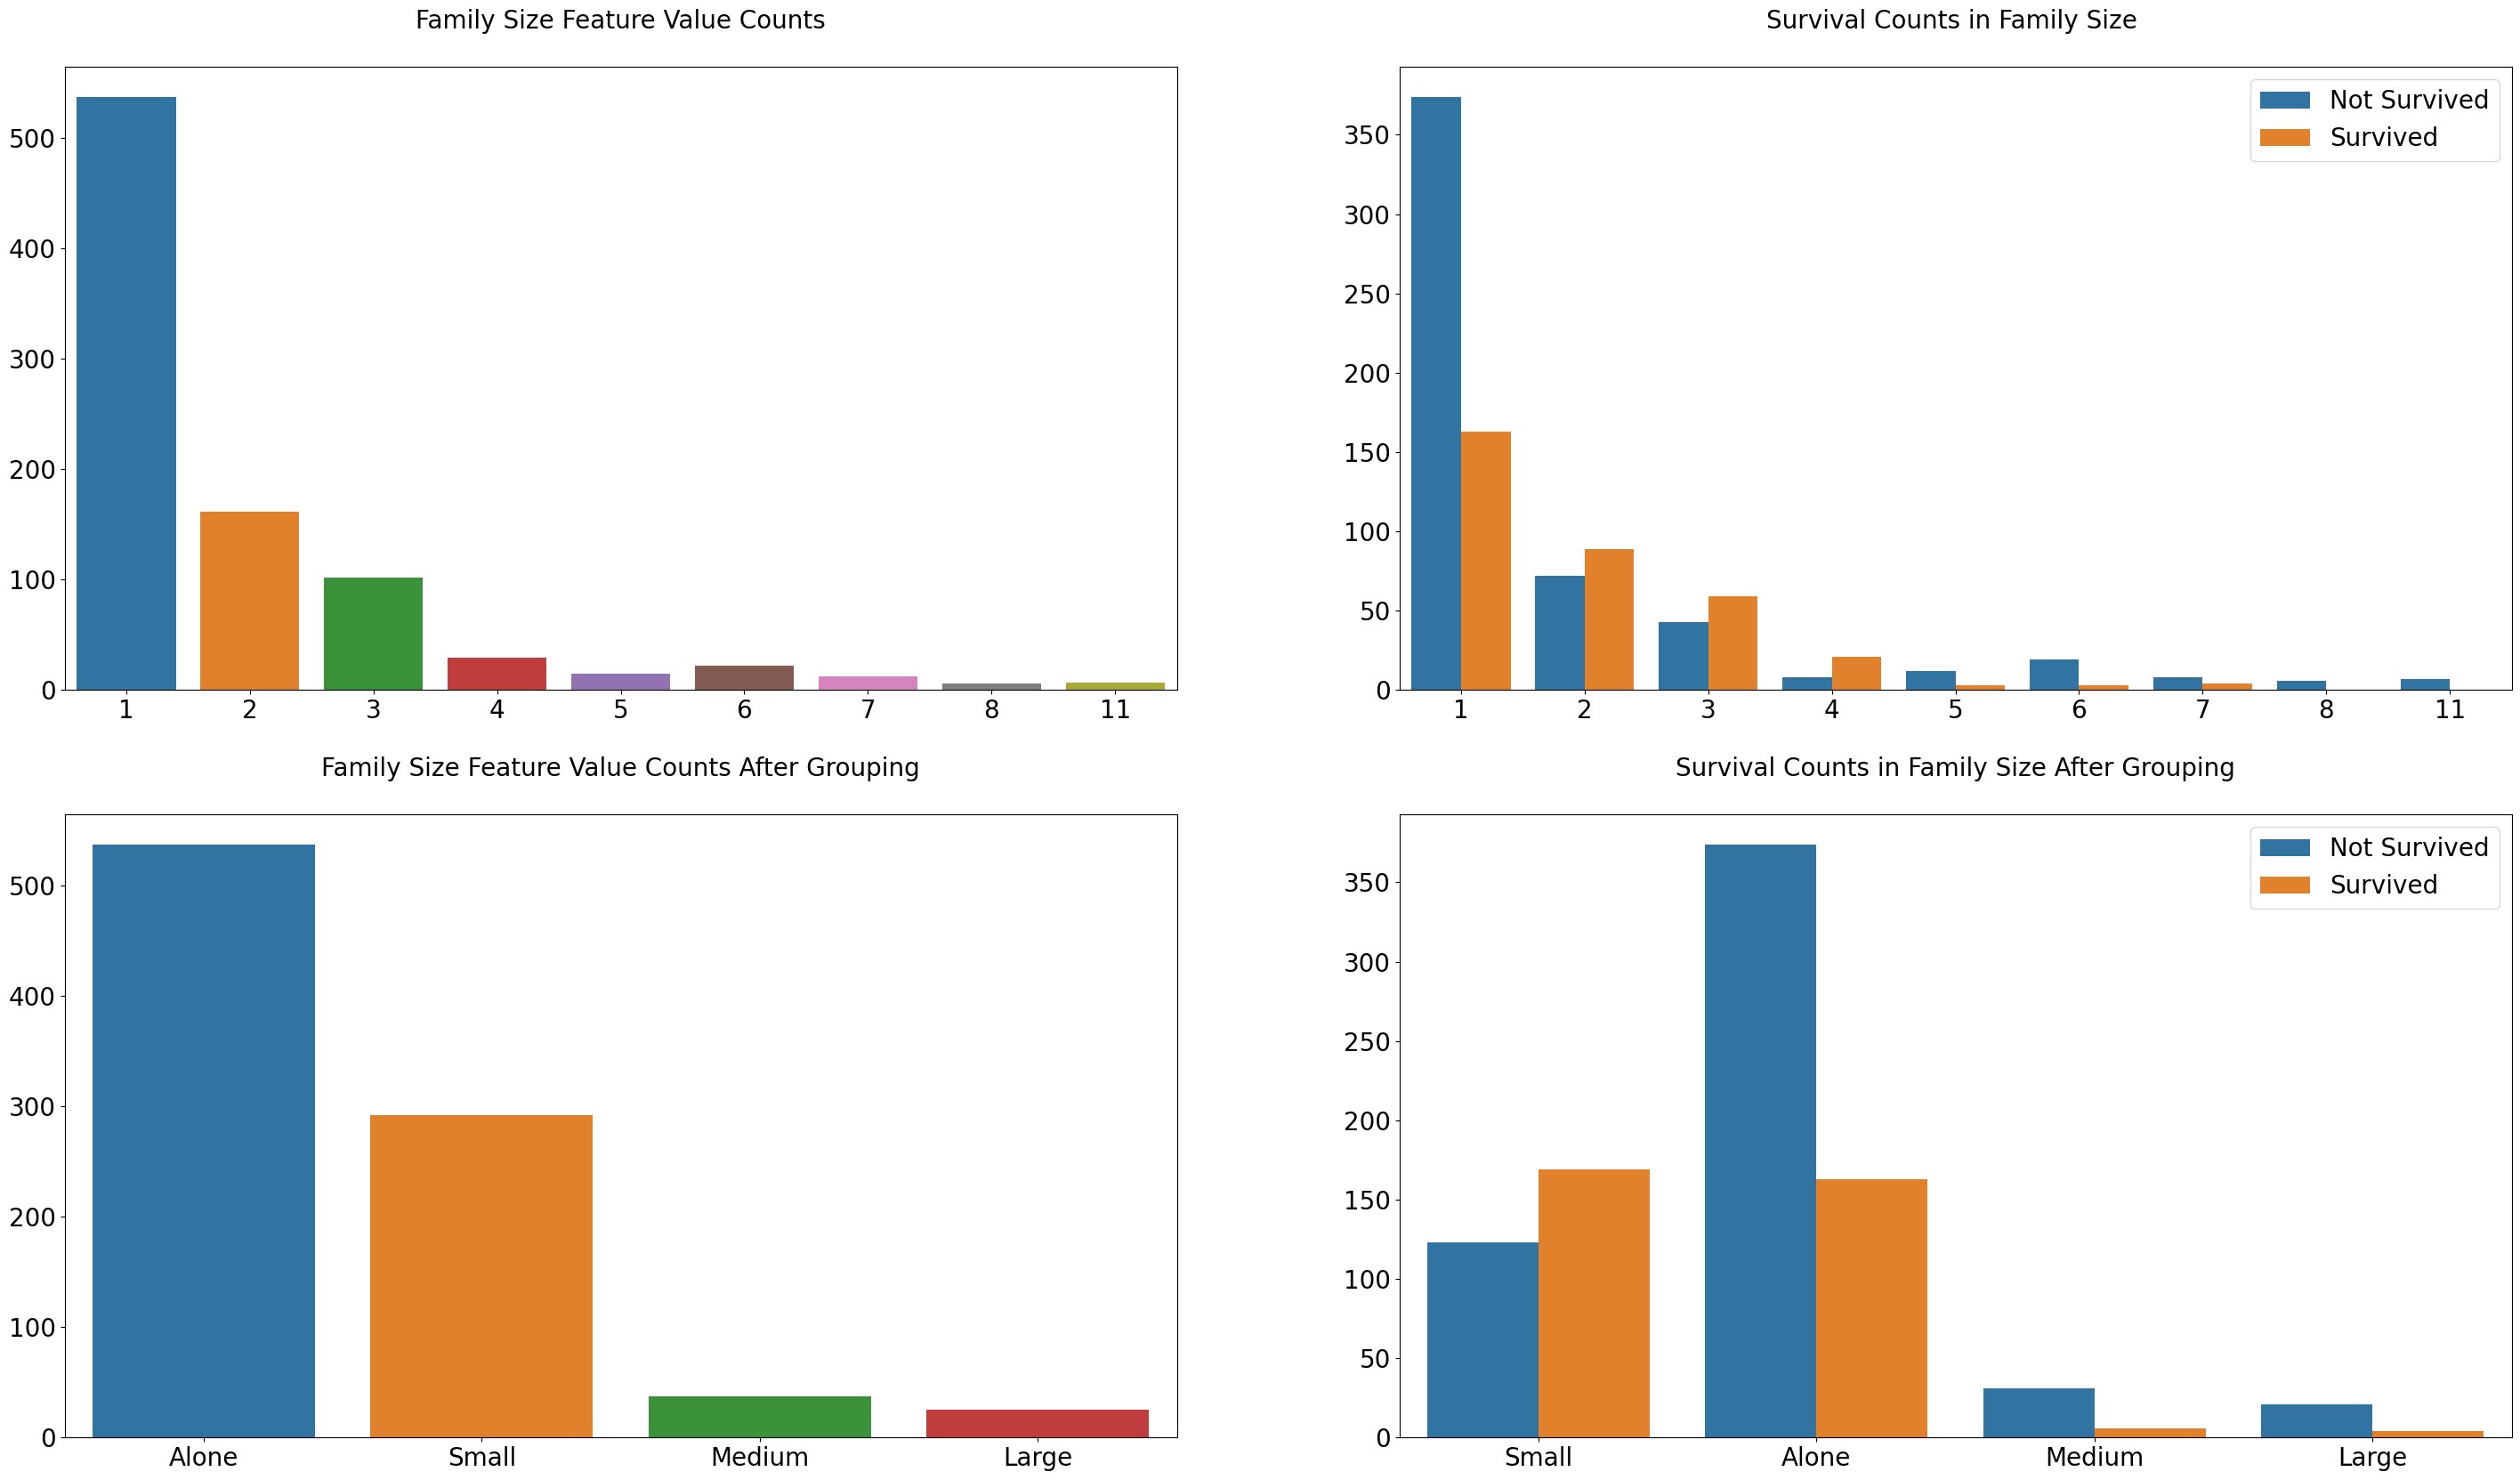

In [33]:
o1['Family_Size'] = o1['SibSp'] + o1['Parch'] + 1

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=o1['Family_Size'].value_counts().index, y=o1['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=o1, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
o1['Family_Size_Grouped'] = o1['Family_Size'].map(family_map)

sns.barplot(x=o1['Family_Size_Grouped'].value_counts().index, y=o1['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=o1, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

#### Note that if the passenger was alone or was a part of medium or large family, the chance of survuival is less as compared to small ones. Also, one would expect these family people to have same ticket number. it is observed that passengers who were friends, nannies or family took ticket as a group so same ticket number came for many people and hence some relation can be seen. Let us see

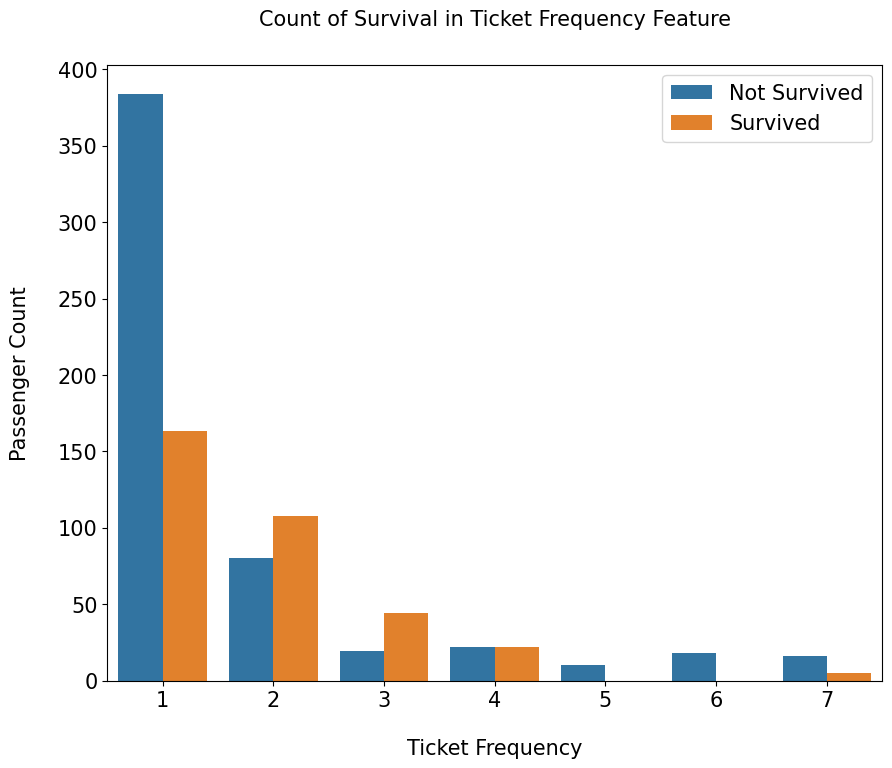

In [34]:
o1['Ticket_Frequency'] = o1.groupby('Ticket')['Ticket'].transform('count')

fig, axs = plt.subplots(figsize=(10, 8))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=o1)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

#### Groups of 2,3 and 4 had more chances of survival than being alone or in groups of more. This feature is based on ticket number and is not similar to family size feature. Let us now focus on Title column.
#### Miss, Mrs, Ms, Mlle, Lady, Mme, the Countess, Dona titles are replaced with Miss/Mrs/Ms because all of them are female. Values like Mlle, Mme and Dona are actually the name of the passengers, but they are classified as titles because Name feature is split by comma. Dr, Col, Major, Jonkheer, Capt, Sir, Don and Rev titles are replaced with Dr/Military/Noble/Clergy because those passengers have similar characteristics. Master is a unique title. It is given to male passengers below age 26. They have the highest survival rate among all males.
#### Is_Married is a binary feature based on the Mrs title. Mrs title has the highest survival rate among other female titles. This title needs to be a feature because all female titles are grouped with each other.

C:\Users\HARIKRISHNAN M\AppData\Local\Temp\ipykernel_2716\84456607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o1['Is_Married'].loc[o1['Title'] == 'Mrs'] = 1


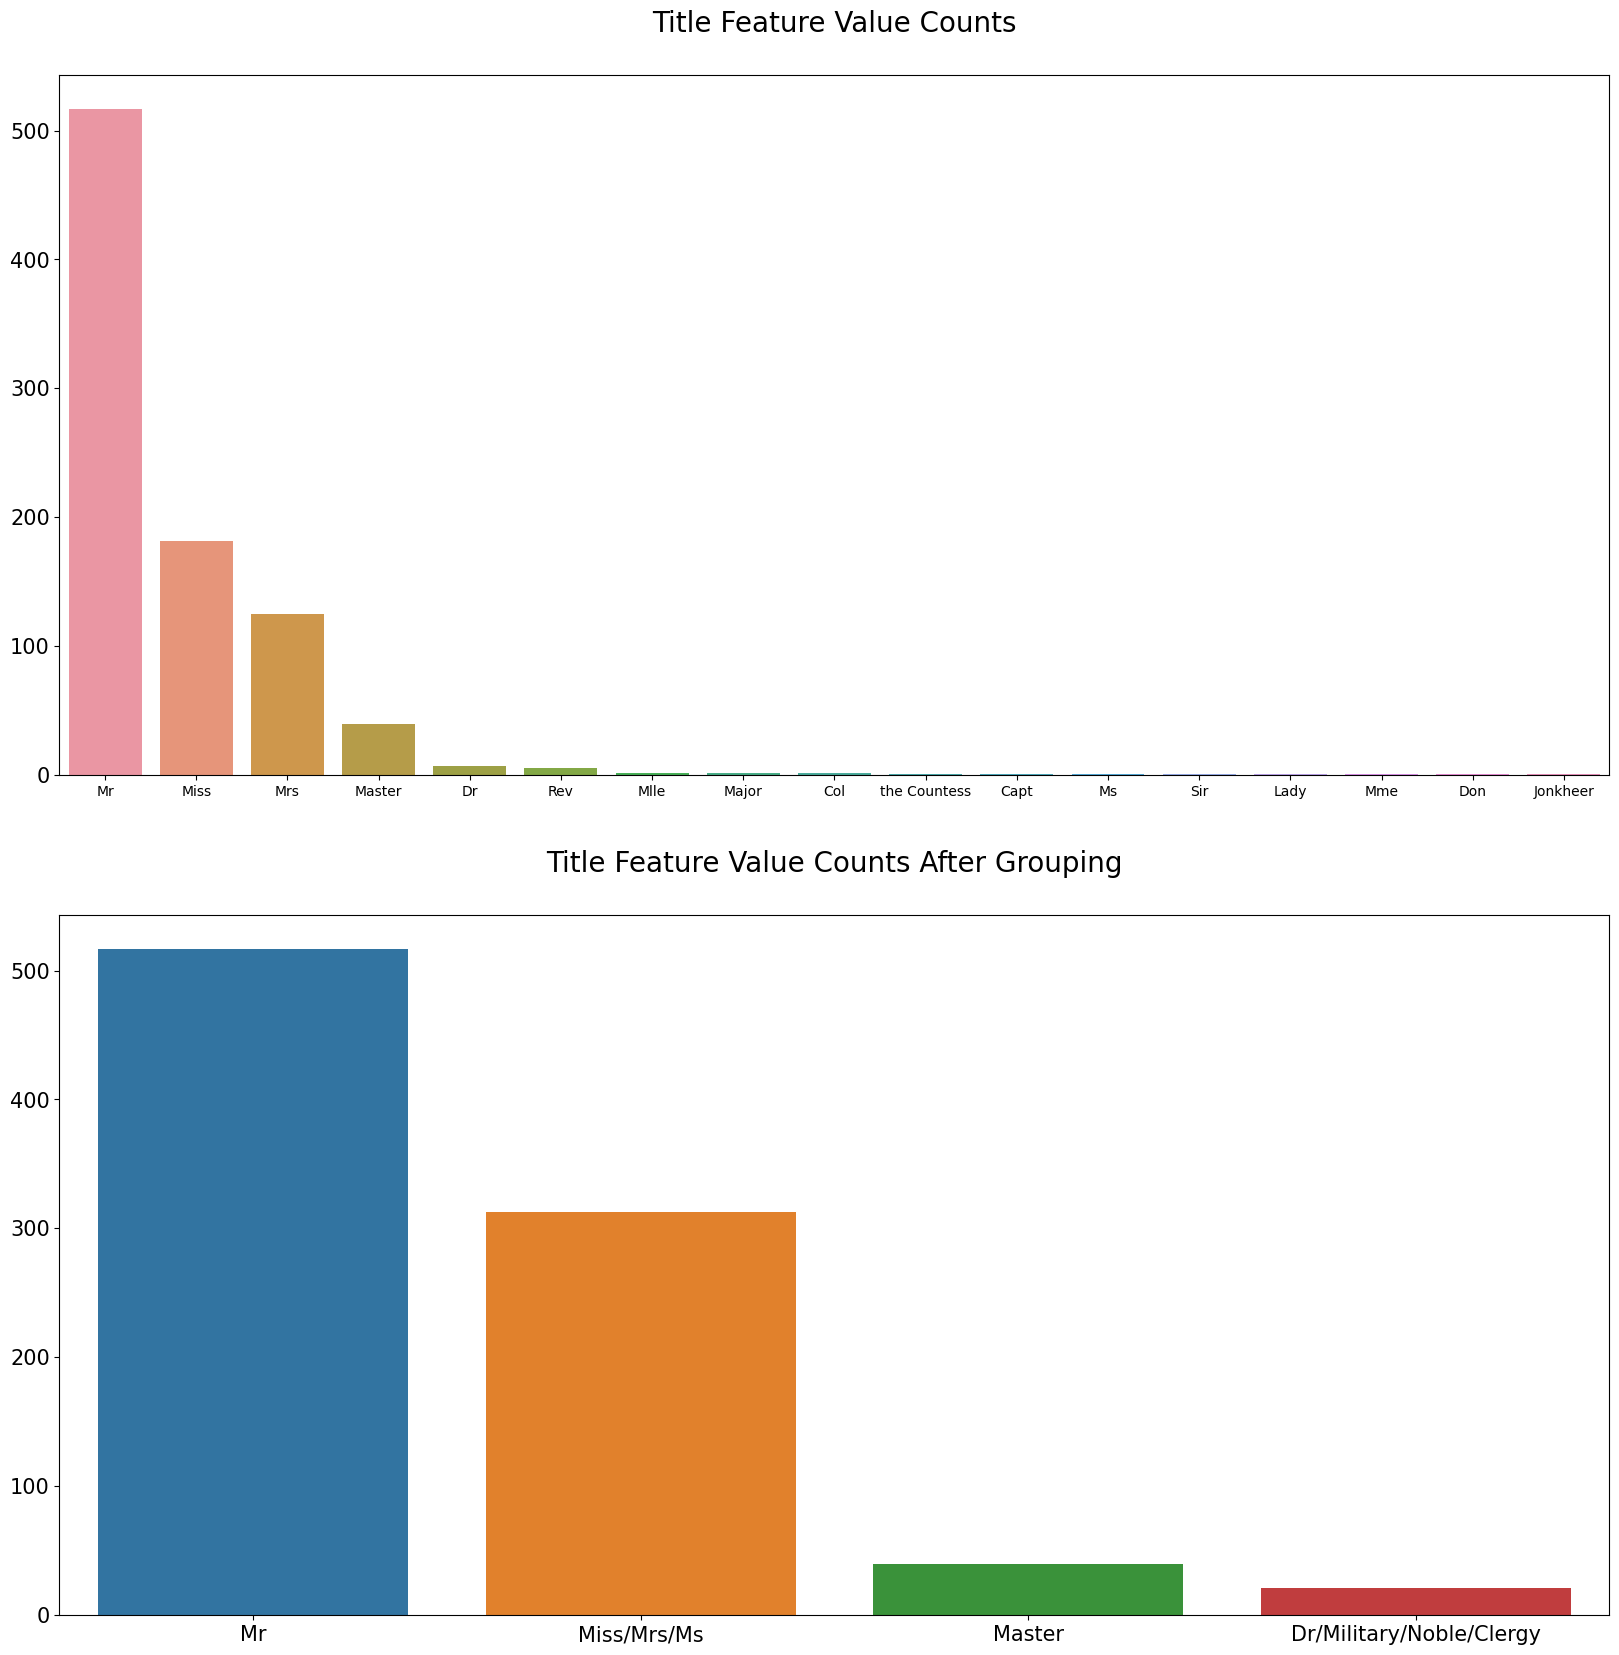

In [35]:
o1['Title'] = o1['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
o1['Is_Married'] = 0
o1['Is_Married'].loc[o1['Title'] == 'Mrs'] = 1

fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=o1['Title'].value_counts().index, y=o1['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

o1['Title'] = o1['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
o1['Title'] = o1['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=o1['Title'].value_counts().index, y=o1['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

## Target Encoding

#### The Fmaily column is created from teh surnames. The survival rate is calculated for families with more than 1 members in that list, and stored in Family_Survival_Rate feature. Unique family surnames are put in Family_Survival_Rate_NA. Similarly, ticket survival rate is also created in a similar way.

In [36]:
o1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          891 non-null    int64   
 1   Survived             891 non-null    int64   
 2   Pclass               891 non-null    int64   
 3   Name                 891 non-null    object  
 4   Sex                  891 non-null    object  
 5   Age                  891 non-null    category
 6   SibSp                891 non-null    int64   
 7   Parch                891 non-null    int64   
 8   Ticket               891 non-null    object  
 9   Fare                 891 non-null    category
 10  Cabin                204 non-null    object  
 11  Embarked             891 non-null    object  
 12  Deck                 891 non-null    object  
 13  Family_Size          891 non-null    int64   
 14  Family_Size_Grouped  891 non-null    object  
 15  Ticket_Frequency     89

In [37]:
import string
def extract_surname(data):    
    
    families = []
    
    for i in range(len(data)):        
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

o1['Family'] = extract_surname(o1['Name'])

In [38]:
# Creating a list of families and tickets that are occuring in both training and test set
non_unique_families = [x for x in o1['Family'].unique()]
non_unique_tickets = [x for x in o1['Ticket'].unique()]

df_family_survival_rate = o1.groupby('Family')['Survived', 'Family','Family_Size'].median()
df_ticket_survival_rate = o1.groupby('Ticket')['Survived', 'Ticket','Ticket_Frequency'].median()

family_rates = {}
ticket_rates = {}

for i in range(len(df_family_survival_rate)):
    # Checking a family exists in both training and test set, and has members more than 1
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

for i in range(len(df_ticket_survival_rate)):
    # Checking a ticket exists in both training and test set, and has members more than 1
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]

C:\Users\HARIKRISHNAN M\AppData\Local\Temp\ipykernel_2716\4163165851.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_family_survival_rate = o1.groupby('Family')['Survived', 'Family','Family_Size'].median()
C:\Users\HARIKRISHNAN M\AppData\Local\Temp\ipykernel_2716\4163165851.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ticket_survival_rate = o1.groupby('Ticket')['Survived', 'Ticket','Ticket_Frequency'].median()


In [39]:
mean_survival_rate = np.mean(o1['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []

for i in range(len(o1)):
    if o1['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[o1['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
o1['Family_Survival_Rate'] = train_family_survival_rate
o1['Family_Survival_Rate_NA'] = train_family_survival_rate_NA

train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []

for i in range(len(o1)):
    if o1['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[o1['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)

        
o1['Ticket_Survival_Rate'] = train_ticket_survival_rate
o1['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA

In [40]:
o1['Survival_Rate'] = (o1['Ticket_Survival_Rate'] + o1['Family_Survival_Rate']) / 2
o1['Survival_Rate_NA'] = (o1['Ticket_Survival_Rate_NA'] + o1['Family_Survival_Rate_NA']) / 2    

## Feature Transformation

#### Label encoding : Embarked, Sex, Deck , Title and Family_Size_Grouped are object type,

In [41]:
from sklearn.preprocessing import LabelEncoder
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']
for feature in non_numeric_features:        
        o1[feature] = LabelEncoder().fit_transform(o1[feature])

####  One-Hot Encoding the Categorical Features : The categorical features (Pclass, Sex, Deck, Embarked, Title) are converted to one-hot encoded features with OneHotEncoder

In [42]:
from sklearn.preprocessing import OneHotEncoder
cat_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(o1[feature].values.reshape(-1, 1)).toarray()
        n = o1[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = o1.index
        encoded_features.append(encoded_df)

o1 = pd.concat([o1, *encoded_features[:6]], axis=1)

#### Dropping useless features

In [43]:
o1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Deck', 'Family_Size',
       'Family_Size_Grouped', 'Ticket_Frequency', 'Title', 'Is_Married',
       'Family', 'Family_Survival_Rate', 'Family_Survival_Rate_NA',
       'Ticket_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Survival_Rate',
       'Survival_Rate_NA', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_1',
       'Sex_2', 'Deck_1', 'Deck_2', 'Deck_3', 'Deck_4', 'Embarked_1',
       'Embarked_2', 'Embarked_3', 'Title_1', 'Title_2', 'Title_3', 'Title_4',
       'Family_Size_Grouped_1', 'Family_Size_Grouped_2',
       'Family_Size_Grouped_3', 'Family_Size_Grouped_4'],
      dtype='object')

In [45]:
drop_cols = ['Cabin','PassengerId','Deck', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Grouped', 'Survived',
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']
o2=o1
o2.drop(columns=drop_cols, inplace=True)

In [46]:
o2.columns

Index(['Age', 'Fare', 'Ticket_Frequency', 'Is_Married', 'Survival_Rate',
       'Survival_Rate_NA', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_1',
       'Sex_2', 'Deck_1', 'Deck_2', 'Deck_3', 'Deck_4', 'Embarked_1',
       'Embarked_2', 'Embarked_3', 'Title_1', 'Title_2', 'Title_3', 'Title_4',
       'Family_Size_Grouped_1', 'Family_Size_Grouped_2',
       'Family_Size_Grouped_3', 'Family_Size_Grouped_4'],
      dtype='object')

# MinMaxScaling

In [47]:
X = o2[['Age', 'Fare', 'Ticket_Frequency']]
Xa = o2.drop(['Age', 'Fare', 'Ticket_Frequency'], axis=1)

In [48]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(X, columns = ['Age', 'Fare', 'Ticket_Frequency'])

In [49]:
X.describe()

,Age,Fare,Ticket_Frequency
count,891.000000,891.000000,891.000000
mean,0.480234,0.492611,0.131313
std,0.319968,0.315041,0.226857
min,0.000000,0.000000,0.000000
25%,0.222222,0.208333,0.000000
50%,0.444444,0.500000,0.000000
75%,0.777778,0.750000,0.166667
max,1.000000,1.000000,1.000000


In [50]:
X = pd.concat([X,Xa], axis=1)

In [51]:
X.describe()

,Age,Fare,Ticket_Frequency,Is_Married,Survival_Rate,Survival_Rate_NA,Pclass_1,Pclass_2,Pclass_3,Sex_1,...,Embarked_2,Embarked_3,Title_1,Title_2,Title_3,Title_4,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.480234,0.492611,0.131313,0.140292,0.445578,0.403479,0.242424,0.206510,0.551066,0.352413,...,0.086420,0.725028,0.023569,0.044893,0.351291,0.580247,0.602694,0.028058,0.041526,0.327722
std,0.319968,0.315041,0.226857,0.347485,0.272776,0.439227,0.428790,0.405028,0.497665,0.477990,...,0.281141,0.446751,0.151787,0.207186,0.477642,0.493796,0.489615,0.165232,0.199616,0.469646
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.208333,0.000000,0.000000,0.383838,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.444444,0.500000,0.000000,0.000000,0.383838,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.777778,0.750000,0.166667,0.000000,0.500000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# kNN Model

In [52]:
Y = oo.Survived
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state = 42)

C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

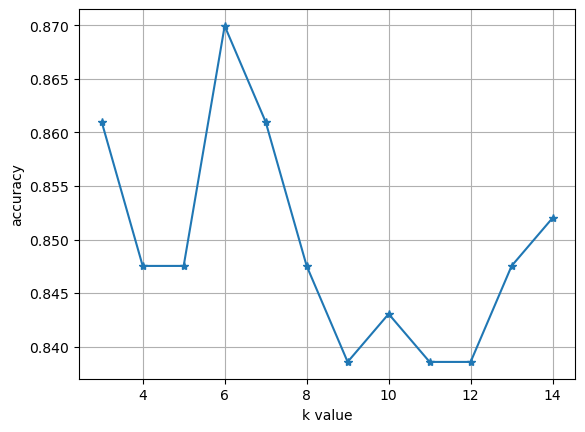

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
metric_k = []
neighbours = np.arange(3,15)

for k in neighbours:
        knn = KNeighborsClassifier(n_neighbors=k)
        model_knn = knn.fit(X_train, Y_train)
        Y_pred_knn = model_knn.predict(X_test)
        acc=accuracy_score(Y_test,Y_pred_knn)
        metric_k.append(acc)
plt.plot(neighbours,metric_k,'*-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [57]:
knn = KNeighborsClassifier(n_neighbors=6)
model_knn = knn.fit(X_train, Y_train)
Y_pred_knn = model_knn.predict(X_test)
acc=accuracy_score(Y_test,Y_pred_knn)
print('Accuracy score for kNN',acc)
score_knn = model_knn.score(X_test,Y_test)
score_knn

Accuracy score for kNN 0.8699551569506726


C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

0.8699551569506726

## KFold

In [59]:
from sklearn.model_selection import KFold
kfold_validator = KFold(10)

# evaluation
from sklearn.model_selection import cross_val_score
kfold_knn = cross_val_score(model_knn,X,Y,cv=kfold_validator)
print(kfold_knn)
print(np.mean(kfold_knn))

[0.83333333 0.91011236 0.7752809  0.85393258 0.8988764  0.85393258
 0.80898876 0.80898876 0.88764045 0.8988764 ]
0.852996254681648


C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

## Stratified KFold

In [60]:
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold(n_splits=10)

# evaaluation
skfold_knn = cross_val_score(model_knn, X, Y, cv = skfold_validator)
print(skfold_knn)
print(np.mean(skfold_knn))

[0.86666667 0.87640449 0.76404494 0.87640449 0.93258427 0.83146067
 0.83146067 0.79775281 0.8988764  0.87640449]
0.8552059925093634


C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HARIKRISHNAN M\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

# SVM Linear

In [61]:
from sklearn.svm import SVC
svm_lin = SVC(kernel='linear')
svm_l = svm_lin.fit(X_train, Y_train)
score_svml = svm_l.score(X_test,Y_test)
score_svml

0.8699551569506726

## KFold

In [62]:
from sklearn.model_selection import KFold
kfold_validator = KFold(10)

# evaluation
from sklearn.model_selection import cross_val_score
kfold_svml = cross_val_score(svm_l,X,Y,cv=kfold_validator)
print(kfold_svml)
print(np.mean(kfold_svml))

[0.9        0.8988764  0.85393258 0.88764045 0.86516854 0.83146067
 0.84269663 0.82022472 0.93258427 0.86516854]
0.8697752808988766


## Stratified KFold

In [63]:
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold(n_splits=10)

# evaaluation
skfold_svml = cross_val_score(svm_l, X, Y, cv = skfold_validator)
print(skfold_svml)
print(np.mean(skfold_svml))

[0.87777778 0.8988764  0.82022472 0.87640449 0.88764045 0.83146067
 0.85393258 0.83146067 0.92134831 0.86516854]
0.8664294631710362


# SVM Polynomial Model

In [175]:
from sklearn.svm import SVC
svm_pol = SVC(kernel='poly', degree = 3.0)
svm_p = svm_pol.fit(X_train, Y_train)
score_svmp = svm_p.score(X_test,Y_test)
score_svmp

0.8834080717488789

## KFold

In [176]:
from sklearn.model_selection import KFold
kfold_validator = KFold(10)

# evaluation
from sklearn.model_selection import cross_val_score
kfold_svmp = cross_val_score(svm_p,X,Y,cv=kfold_validator)
print(kfold_svmp)
print(np.mean(kfold_svmp))

[0.9        0.8988764  0.84269663 0.87640449 0.88764045 0.84269663
 0.84269663 0.84269663 0.8988764  0.87640449]
0.8708988764044943


## Stratified KFold

In [177]:
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold(n_splits=10)

# evaaluation
skfold_svmp = cross_val_score(svm_p, X, Y, cv = skfold_validator)
print(skfold_svmp)
print(np.mean(skfold_svmp))

[0.9        0.91011236 0.80898876 0.88764045 0.91011236 0.83146067
 0.86516854 0.86516854 0.8988764  0.87640449]
0.8753932584269662


# SVM RBF Model

In [87]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf', degree = 2)
svm_r = svm_rbf.fit(X_train, Y_train)
score_svmr = svm_r.score(X_test,Y_test)
score_svmr

0.8609865470852018

## KFold

In [81]:
from sklearn.model_selection import KFold
kfold_validator = KFold(10)

# evaluation
from sklearn.model_selection import cross_val_score
kfold_svmr = cross_val_score(svm_r,X,Y,cv=kfold_validator)
print(kfold_svmr)
print(np.mean(kfold_svmr))

[0.88888889 0.91011236 0.82022472 0.85393258 0.87640449 0.83146067
 0.85393258 0.78651685 0.92134831 0.87640449]
0.8619225967540576


## Stratified KFold

In [82]:
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold(n_splits=10)

# evaaluation
skfold_svmr = cross_val_score(svm_r, X, Y, cv = skfold_validator)
print(skfold_svmr)
print(np.mean(skfold_svmr))

[0.88888889 0.91011236 0.79775281 0.86516854 0.8988764  0.82022472
 0.87640449 0.78651685 0.8988764  0.87640449]
0.8619225967540574


# SVM Sigmoid Model

In [92]:
from sklearn.svm import SVC
svm1 = SVC(kernel='sigmoid', gamma = 'auto')
svm_s = svm1.fit(X_train, Y_train)
score_svms = svm_s.score(X_test,Y_test)
score_svms

0.8430493273542601

## KFold

In [94]:
from sklearn.model_selection import KFold
kfold_validator = KFold(10)

# evaluation
from sklearn.model_selection import cross_val_score
kfold_svms = cross_val_score(svm_s,X,Y,cv=kfold_validator)
print(kfold_svms)
print(np.mean(kfold_svms))

[0.84444444 0.87640449 0.79775281 0.87640449 0.82022472 0.82022472
 0.79775281 0.78651685 0.8988764  0.85393258]
0.8372534332084893


## Stratified KFold

In [95]:
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold(n_splits=10)

# evaaluation
skfold_svms = cross_val_score(svm_s, X, Y, cv = skfold_validator)
print(skfold_svms)
print(np.mean(skfold_svms))

[0.84444444 0.87640449 0.78651685 0.87640449 0.84269663 0.80898876
 0.80898876 0.78651685 0.87640449 0.85393258]
0.8361298377028714


# Hyperparameter Tuning

## SVM Polynomial gave the highest CV_score as compared to other models using Stratified KFold.

In [97]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,Y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

In [98]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=1, kernel='poly')


## Tuning did not perform well. Default SVM Polynomial Model is selected the optimum one. 